<a href="https://colab.research.google.com/github/ShreyaKandhagatla/FAKE-NEWS-DETECTION/blob/main/FAKENEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [15]:
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")

In [16]:
fake.shape

(23481, 4)

In [ ]:
true.shape

In [18]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [19]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [20]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [21]:
# Check the data
data.head()

,title,text,subject,date,target
0,"DNC Vice Chair RESIGNS, Declares Support For ...","On Sunday, Tulsi Gabbard appeared on Meet The ...",News,"February 28, 2016",fake
1,SECRET DUMPS OF TOXIC WASTE ON PRIVATE PROPERT...,This story gets more and more unbelievable eve...,Government News,"Aug 17, 2015",fake
2,U.S. carrier patrols off Korean peninsula in w...,"ABOARD USS RONALD REAGAN, Sea of Japan (Reuter...",worldnews,"October 19, 2017",true
3,British negotiators still working on Brexit de...,LONDON (Reuters) - British negotiators are sti...,worldnews,"November 29, 2017",true
4,"Bernie Sanders: When you’re White, you don’t k...",Bernie Sanders is so focused on pandering to b...,politics,"Mar 7, 2016",fake


In [22]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,"DNC Vice Chair RESIGNS, Declares Support For ...","On Sunday, Tulsi Gabbard appeared on Meet The ...",News,fake
1,SECRET DUMPS OF TOXIC WASTE ON PRIVATE PROPERT...,This story gets more and more unbelievable eve...,Government News,fake
2,U.S. carrier patrols off Korean peninsula in w...,"ABOARD USS RONALD REAGAN, Sea of Japan (Reuter...",worldnews,true
3,British negotiators still working on Brexit de...,LONDON (Reuters) - British negotiators are sti...,worldnews,true
4,"Bernie Sanders: When you’re White, you don’t k...",Bernie Sanders is so focused on pandering to b...,politics,fake


In [23]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"On Sunday, Tulsi Gabbard appeared on Meet The ...",News,fake
1,This story gets more and more unbelievable eve...,Government News,fake
2,"ABOARD USS RONALD REAGAN, Sea of Japan (Reuter...",worldnews,true
3,LONDON (Reuters) - British negotiators are sti...,worldnews,true
4,Bernie Sanders is so focused on pandering to b...,politics,fake


In [24]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"on sunday, tulsi gabbard appeared on meet the ...",News,fake
1,this story gets more and more unbelievable eve...,Government News,fake
2,"aboard uss ronald reagan, sea of japan (reuter...",worldnews,true
3,london (reuters) - british negotiators are sti...,worldnews,true
4,bernie sanders is so focused on pandering to b...,politics,fake


In [25]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [26]:
# Check
data.head()

,text,subject,target
0,on sunday tulsi gabbard appeared on meet the p...,News,fake
1,this story gets more and more unbelievable eve...,Government News,fake
2,aboard uss ronald reagan sea of japan reuters ...,worldnews,true
3,london reuters british negotiators are still ...,worldnews,true
4,bernie sanders is so focused on pandering to b...,politics,fake


In [27]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
data.head()

,text,subject,target
0,sunday tulsi gabbard appeared meet press annou...,News,fake
1,story gets unbelievable every day epa record r...,Government News,fake
2,aboard uss ronald reagan sea japan reuters uss...,worldnews,true
3,london reuters british negotiators still worki...,worldnews,true
4,bernie sanders focused pandering blacks trashi...,politics,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


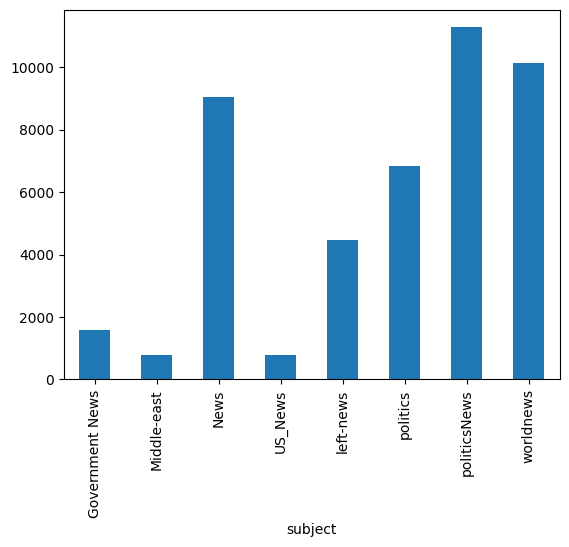

In [29]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


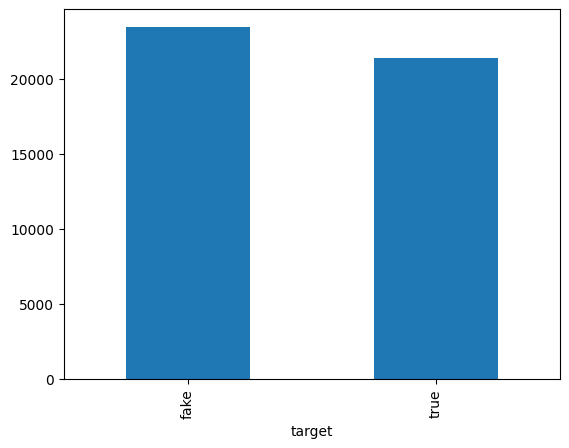

In [30]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

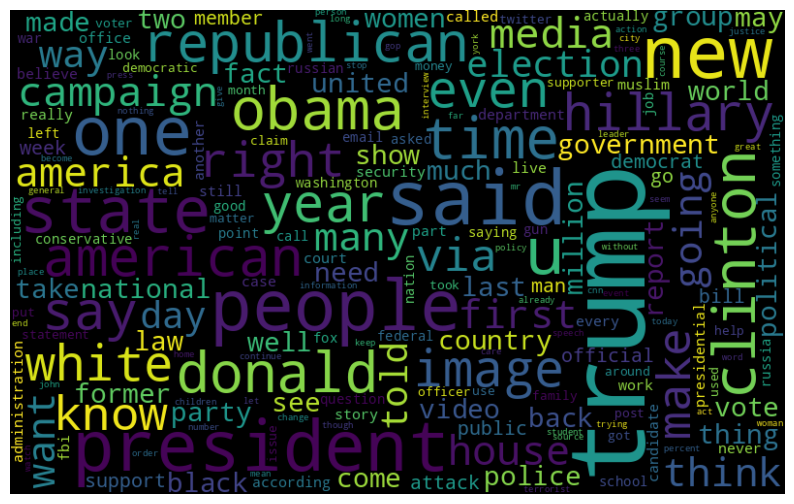

In [31]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

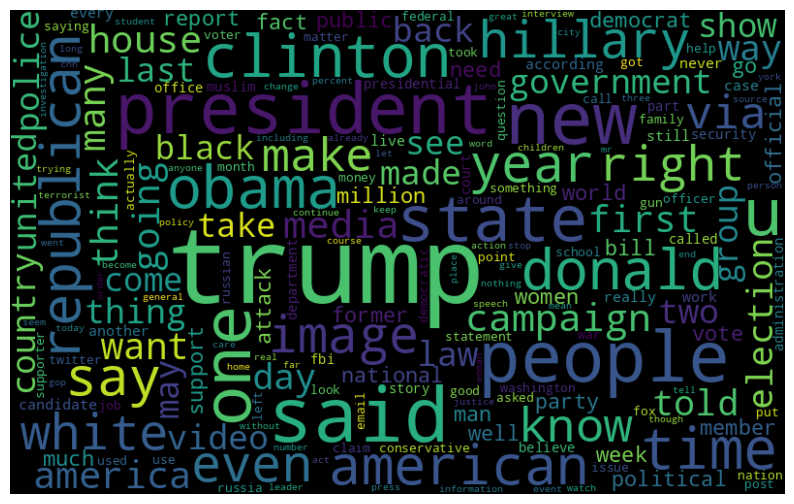

In [32]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

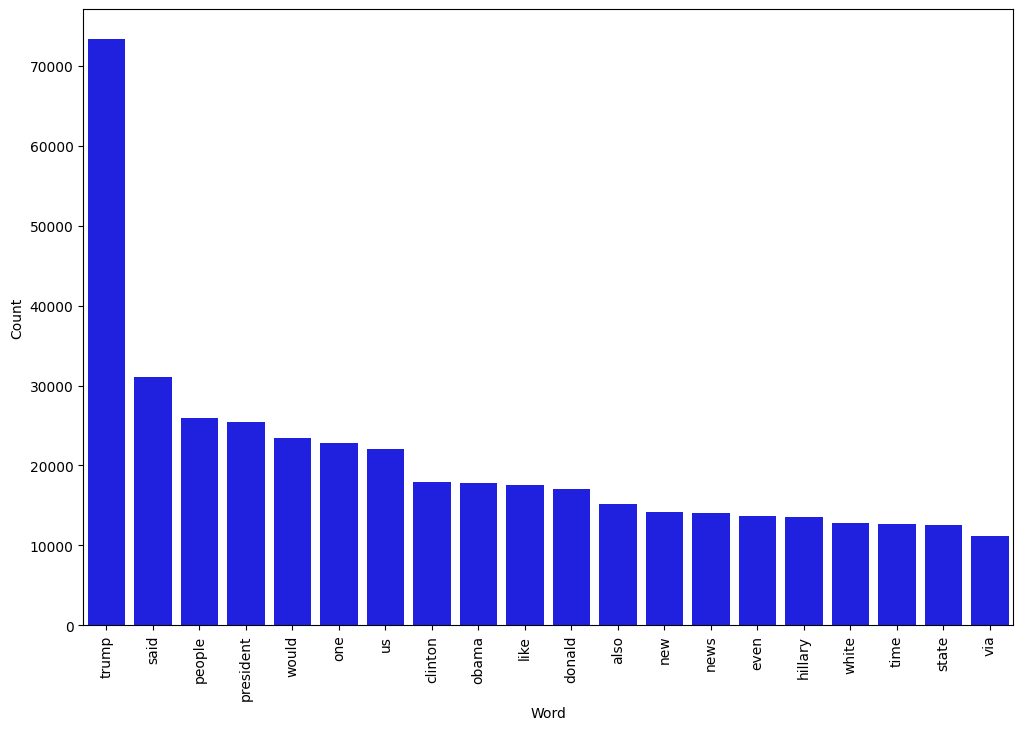

In [34]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

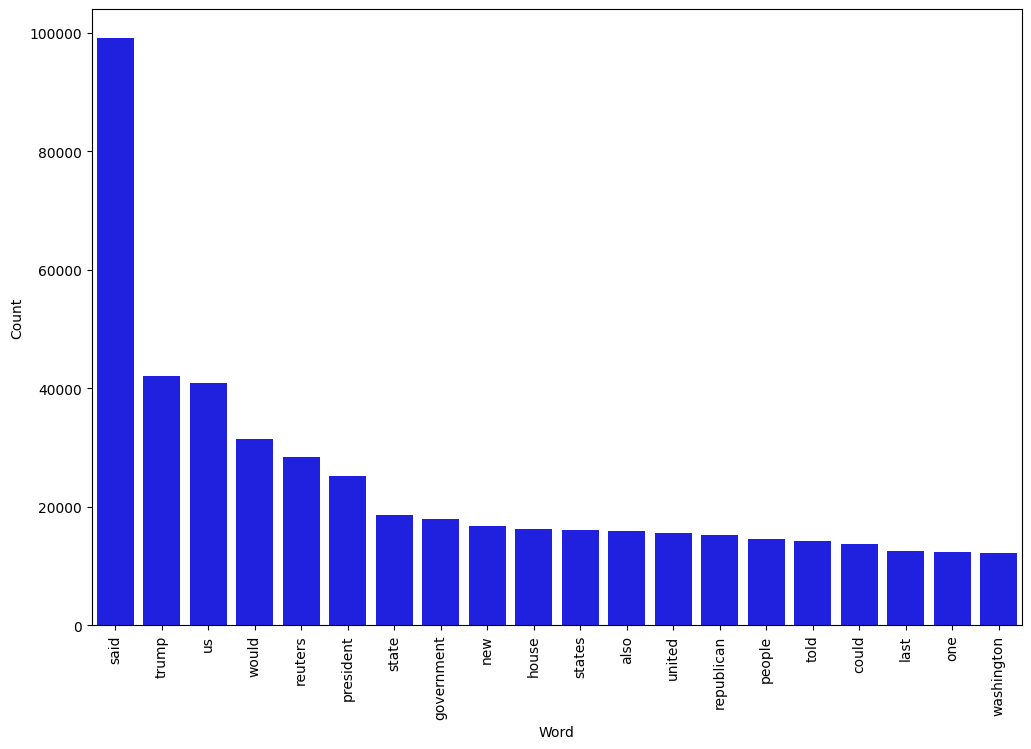

In [35]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [36]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [37]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [38]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.74%


Confusion matrix, without normalization


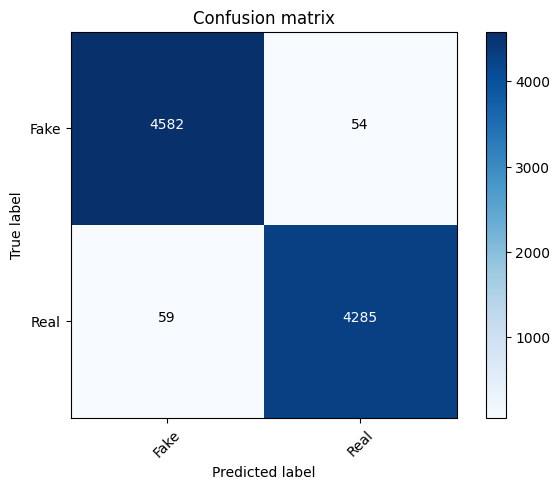

In [39]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.55%


Confusion matrix, without normalization


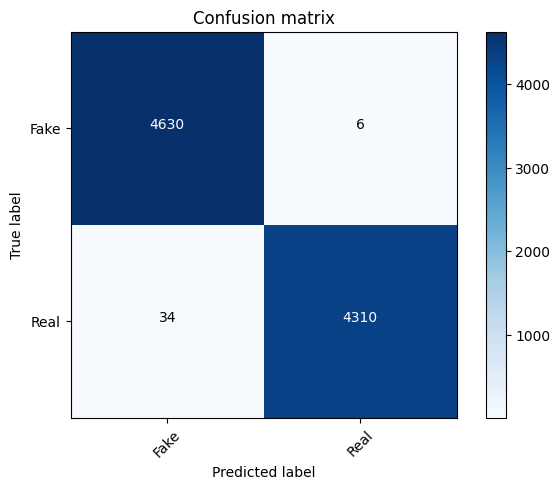

In [41]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [42]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.78%


Confusion matrix, without normalization


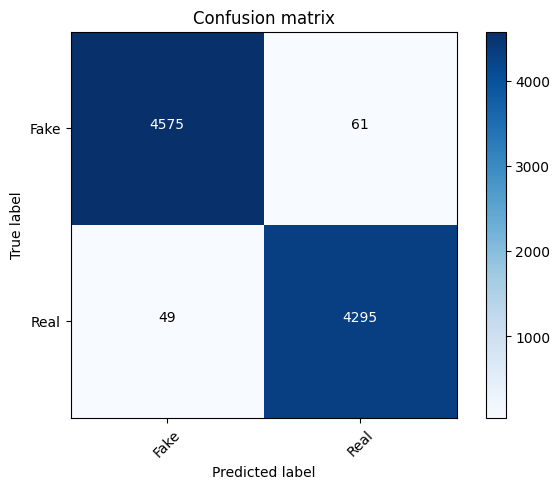

In [43]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])